# Questions/comments for Jon:
1. This doesn't include the initial setup with GEE/Colab -- I'm not sure if you already have something you like to use for that from your courses? If not, I can put that together based on the NEON intro the GEE tutorials
2. Do you think there are any additional reflection questions I should add?


## Day 1 NEON AOP walkthrough

In this notebook, we'll walk through: <br>
1. Visualizing NEON AOP hyperspectral data
2. Masking data using QA bands
3. Exploring spectral signatures over space
4. Calculating vegetation indices
5. Zonal statistics using a landcover data product derived from satellite imagery (Landsat)


Acknowledgement:
> The National Ecological Observatory Network is a program sponsored by the National Science Foundation and operated under cooperative agreement by Battelle. This material is based in part upon work supported by the National Science Foundation through the NEON Program."

This notebook was adapted from [NEON Intro to AOP Data in Google Earth Engine](https://www.neonscience.org/resources/learning-hub/tutorials/intro-aop-data-google-earth-engine-tutorial-series). The [NEON learning hub](https://www.neonscience.org/resources/learning-hub) is a great resource to learn more!


In [1]:
import ee
import geemap
import geemap.colormaps as cm
ee.Authenticate()
ee.Initialize(project='511923968009')
geemap.ee_initialize(project='511923968009')

# Visualizing NEON AOP hyperspectral data

## Importing and viewing NEON AOP data

## Importing AOP data

In the code chunk below, we import 4 ImageCollections:<br>
  - [Surface Directional Reflectance](https://data.neonscience.org/data-products/DP3.30006.001)
  - [High resolution camera imagery, red-green-blue (RGB)](https://data.neonscience.org/data-products/DP3.30010.001)
  - [Canopy height model](https://data.neonscience.org/data-products/DP3.30015.001)
  - [Digital elevation model](https://data.neonscience.org/data-products/DP3.30024.001)

In [2]:
# Import the AOP surface directional reflectance (SDR)
aopSDR = ee.ImageCollection('projects/neon-prod-earthengine/assets/DP3-30006-001')
# Import the AOP red-green-blue imagery (RGB)
aopRGB = ee.ImageCollection('projects/neon-prod-earthengine/assets/DP3-30010-001')
# Import the AOP canopy height model data (CHM)
aopCHM = ee.ImageCollection('projects/neon-prod-earthengine/assets/DP3-30015-001')
# Import the AOP digital elevation model data (DEM)
aopDEM = ee.ImageCollection('projects/neon-prod-earthengine/assets/DP3-30024-001')

## Exploring the available AOP data

In the code chunk below, we print out the name of each SDR dataset currently available on GEE.

Then, we see how to filter the ImageCollection to only show Images that match our site of interest and/or dates of interest.

In [3]:
# See all SDR data currently uploaded
aopSDR.aggregate_array('system:index')

In [4]:
# Filter the data to only dates or sites of interest

# read in a single SDR image at the NEON site JERC in 2018
JERC_2018 = ee.ImageCollection("projects/neon-prod-earthengine/assets/DP3-30006-001") \
  .filterDate('2018-01-01', '2018-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'JERC') \
  .first()

JERC_2018

### Reflection questions (discuss in groups of 3)
1. Inspect the image that prints after the code chunk above, then answer the following:
  - How many bands does the 2018 JERC surface reflectance have? What does those bands represent?
  - What properties does the 2018 JERC surface reflectance have?
    - What do you think WL_FWHM_B### means? [(hint)](https://www.neonscience.org/resources/learning-hub/tutorials/hyper-spec-intro)


For question 2, divide up the 3 remaining data products (RGB, CHM, DEM) among group members.
2. Modify the code chunk above to repeat this process for 1 image from each of the 4 NEON AOP ImageCollections we imported. Take notes on the bands and properties associated with each ImageCollection. *HINT: You may need to look at sites beyond JERC. Check the data availability!*
  - What properties do you notice all Images have in common?
  - What is unique to specific data types?

## Visualizing

In [5]:
# Create variables for some of the images we may want to visualize
SOAP_2019_sdr = aopSDR \
  .filterDate('2019-01-01', '2019-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()

SOAP_2021_sdr = aopSDR \
  .filterDate('2021-01-01', '2021-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()

SOAP_2019_rgb = aopRGB \
  .filterDate('2019-01-01', '2019-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()

SOAP_2021_rgb = aopRGB \
  .filterDate('2021-01-01', '2021-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()

SOAP_2019_chm = aopCHM \
  .filterDate('2019-01-01', '2019-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()

SOAP_2021_chm = aopCHM \
  .filterDate('2021-01-01', '2021-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()

SOAP_2021_dem = aopDEM \
  .filterDate('2021-01-01', '2021-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()



In [6]:
# Set up visualization params
RGB_bands = ['B053', 'B035', 'B019'] # These are the band names for the red, green, blue bands in the SDR data
rgbVis = {'min': 0, 'max': 1260, 'gamma': 0.8} # This sets a nice range of values for mapping the RGB data
demVis = {'min': 0, 'max': 1260, 'gamma': 0.8} # Change these values to make your DEM layer look better. What do you think appropriate min/max values would be?

# Create maps
m = geemap.Map() # initialize the Map object

m.addLayer(SOAP_2021_dem, demVis, 'SOAP 2021 DEM') # Add the DEM
m.addLayer(SOAP_2021_sdr.select(RGB_bands), rgbVis, 'SOAP 2021 SDR RGB') # Add the red-green-blue bands from the SDR data
m.centerObject(SOAP_2021_dem, 12)


m # display the Map object

Map(center=[37.0473267491171, -119.25465121198724], controls=(WidgetControl(options=['position', 'transparent_…

## Reflection questions (think-pair-share)
1. Why does one of the layers looks pink when we first run this code?
2. What do you think would be appropriate min/max values for the DEM? Update your map to use these updated DEM values. *Hint: update the demVis variable.*
3. Why are there vertical stripes in the RGB imagery?
4. Try plotting a "false-color composite" using the SDR data. A popular false-color composite is NIR-R-G, which just means that we plot the near infrared (NIR), red, and green bands. Or, you can try SWIR-NIR-R *Hint: the SWIR band is 365, the NIR band is band 97*
  - [Here](https://earthobservatory.nasa.gov/features/FalseColor/page6.php) is helpful resource from NASA about popular false-color composites.
5. A significant event happened at Soaproot Saddle in 2020. Using the SOAP layers we've explored so far, try to see if you can figure out what happened!
  - What layers show the biggest changes in 2019 vs 2021?
  - How can you find more information to confirm your guess?

Don't worry if it's not yet clear what happened at SOAP in 2020 year. We'll come back to this question soon...

# Masking data

As we saw in the map above, there are some data quality issues in the raw imagery. Let's apply QA masks to our data and compare maps of the masked vs unmasked data.

In [7]:
SOAP_2019_sdr.select('[^B]*') # Select the non-reflectance bands (all the bands that don't start with B in this case)

## Reflection questions (work in groups of 3)
In the print-out of the image above, you can see 16 QA and metadata bands. For this example, we'll be using the Weather_Quality_Indicator.

1. Create a new code chunk. Using the code you saw in the sections above, select only the Weather_Quality_Indicator band. Then, create a map of that band. Are there any pixels impacted by poor weather in the 2019 SDR data? *Hint: You can use the color palette defined below*


```
# Define a palette for the weather - to match NEON AOP's weather color conventions
gyrPalette = [
  '00ff00', # green  (<10% cloud cover)
  'ffff00', # yellow (10-50% cloud cover)
  'ff0000'  # red    (>50% cloud cover)
]

weather_qaParams = {'min':1, 'max':3, 'palette': gyrPalette}
```



Now, we're ready to mask all pixels that have >10% cloud cover.  

Masking is the process of "hiding" pixels based on a mask layer, as shown in this image from NEON:
<img src='https://drive.google.com/uc?export=view&id=1YkSBHbodr6zLshOIFBac8AFRBJsMpSHT' width=600> Image credit: [NEON Mask Rasters tutorial](https://www.neonscience.org/resources/learning-hub/tutorials/mask-rasters-py)


In [8]:
# Create a raster where pixels=1 for <10% cloud cover and pixels=0 for >10% cloud cover. This is our mask.
soap_2019_clearWeather = SOAP_2019_sdr.select('Weather_Quality_Indicator').eq(1)

# Apply the clear weather mask to the original data
SOAP_2019_sdr_clear = SOAP_2019_sdr.updateMask(soap_2019_clearWeather)

# Map the unmasked and masked SDR data
m = geemap.Map() # initialize the Map object

m.addLayer(soap_2019_clearWeather, {'min':0, 'max':1}, 'mask')
m.addLayer(SOAP_2019_sdr.select(RGB_bands), rgbVis, 'unmasked SOAP 2019 SDR RGB') # Add the red-green-blue bands from the SDR data
m.addLayer(SOAP_2019_sdr_clear.select(RGB_bands), rgbVis, 'masked SOAP 2019 SDR RGB') # Add the red-green-blue bands from the SDR data
m.centerObject(SOAP_2019_sdr)

m # display the Map object

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# Explore spectral signatures across a study site
In this section, we'll plot the spectral signature of different pixels. Don't worry if you don't quite follow every line of code below, but do explore the interactive map and test out different pixels!

This visualization was developed based on the following tutorials:<br>
[NEON Plot spectral signatures of AOP Reflectance data in GEE](https://www.neonscience.org/resources/learning-hub/tutorials/intro-aop-data-google-earth-engine-tutorial-series#toggle-28) <br>
[geemap GitHub page examples](https://github.com/gee-community/geemap/blob/master/examples/notebooks/geemap_and_earthengine.ipynb)

In [9]:
# Import SDR, RGB data
SOAP_2019_sdr = aopSDR \
  .filterDate('2019-01-01', '2019-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()

SOAP_2019_rgb = aopRGB \
  .filterDate('2019-01-01', '2019-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()

# Select the WL_FWHM_B*** band properties (using regex)
properties = SOAP_2019_sdr.toDictionary()
wl_fwhm_dict = properties.select(['WL_FWHM_B+\d{3}'])

# Pull out the wavelength, fwhm values to a list
wl_fwhm_list = wl_fwhm_dict.values()

# Function to pull out the wavelength values only and convert the string to float
def get_wavelengths(x):
  str_split = ee.String(x).split(',')
  first_elem = ee.Number.parse((str_split.get(0)))
  return first_elem

# apply the function to the wavelength full-width-half-max list
wavelengths = wl_fwhm_list.map(get_wavelengths)

In [24]:
from ipyleaflet import *
from bqplot import pyplot as plt

# Build map
m = geemap.Map()
m.default_style = {"cursor": "crosshair"}

# Set visualization parameters.
rgbVis = {'min': 0, 'max': 255, 'gamma': 0.8}
sdrVis = {'min': 103, 'max': 1160, 'gamma': 0.8}

# Add Earth Engine layers to Map
m.addLayer(SOAP_2019_sdr.select(RGB_bands), sdrVis, "SOAP 2019 SDR")
m.addLayer(SOAP_2019_rgb, rgbVis, "SOAP 2019 RGB")
m.centerObject(SOAP_2019_rgb)

figure = plt.figure(
    1,
    title="Reflectance",
    layout={"height": "200px", "width": "600px"},
)


# Set up variables for plotting markers, reflectance
x = wavelengths.getInfo()
coordinates = []
markers = []
marker_cluster = MarkerCluster(name="Marker Cluster")
m.add_layer(marker_cluster)

# Helper function called each time we click a new point
def handle_interaction(**kwargs):
    latlon = kwargs.get("coordinates")
    if kwargs.get("type") == "click":
      try:
        coordinates.append(latlon)
        markers.append(Marker(location=latlon))
        marker_cluster.markers = markers
        xy = ee.Geometry.Point(latlon[::-1])
        y = SOAP_2019_sdr.select('B.*').sample(xy, 1).first().toDictionary().values().getInfo()
        plt.clear()
        plt.plot(x, y)
      except:
        print('Please click a point inside the SOAP box.')


m.on_interaction(handle_interaction)

fig_control = WidgetControl(widget=figure, position="bottomright")
m.add_control(fig_control)

m

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## Reflection questions

Click around in the scene above. In your group, try to match each spectrum shown below with a category. Are there any other categories that interest you? Can you modify the code above to plot the JERC site?

CATEGORIES:
*   Water
*   Vegetation
*   Rocky outcropping

SPECTRA:<br>
1.
<img src='https://drive.google.com/uc?export=view&id=1FjKTtcKvsZa7OvHf2BcmgsR8JkJ7z5RM' width=400>

2.
<img src='https://drive.google.com/uc?export=view&id=1aMC-5xQjKdMfix2-CjahQZESebGSb5fc' width=400>

3.
<img src='https://drive.google.com/uc?export=view&id=1lPn0V0nezIR39xPbL78yfegZnVzzVqX2' width=400>

# Calculate vegetation indices

In the exercise above, you may have noticed some characteristic features of vegetation spectra, including chlorophyll and water absorption bands.<br>
<img src='https://drive.google.com/uc?export=view&id=1vCj_UtLDbiveY_Oyxw_sO7NUACug3DOX' width=400> Image credit: [NASA](https://science.nasa.gov/ems/01_intro)


Vegetation indices take advantage of some of these characteristics features of vegetation spectra. NDVI, the normalized difference vegetation index, is a common vegetation index. NDVI takes advantage of the characteristic "red edge"  between visible and near infrared bands.

<img src='https://drive.google.com/uc?export=view&id=1vdR7NPvynbN0OPrZYsdiCOVnTxTxo5sH' width=400> Image credit: [USDA, USFS Geospatial Technology and Applications Center Training Materials](https://fsapps.nwcg.gov/gtac/CourseDownloads/Training/Remote_Sensing/DigitalSoilMapping_EarthEngine_NRCS/03_Lectures_FINAL/FinalPDFs_lectures/Day1.3_RSIndices_FINAL.pdf)

Let's take a look at NDVI mapped over JERC.

In [11]:
# Import JERC 2018 data
JERC_2018 = ee.ImageCollection("projects/neon-prod-earthengine/assets/DP3-30006-001") \
  .filterDate('2018-01-01', '2018-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'JERC') \
  .first()

# Calculate NDVI
aop_ndvi = JERC_2018.normalizedDifference(['B097', 'B055']).rename('aop_ndvi') # 'B097'=NIR; 'B055'=red


# Map NDVI for JERC

# set up visualization params
bwgPalette = [
  '#964B00',  # brown (low NDVI)
  'FFFFFF',   # white (med NDVI)
  '00ff00',   # green  (high NDVI)
]
ndviVis = {'min': 0.2, 'max': 1, 'palette': bwgPalette}

# create map
m = geemap.Map()

m.addLayer(JERC_2018.select(RGB_bands), sdrVis, 'JERC 2018 RGB')
m.addLayer(aop_ndvi, ndviVis, 'JERC 2018 NDVI')

m.centerObject(JERC_2018, 12)
m


Map(center=[31.244748611840656, -84.46419349851583], controls=(WidgetControl(options=['position', 'transparent…

You may notice that NDVI gets pretty saturated over this very green site! Let's try another vegetation index, EVI (enhanced vegetation index), which tends to get less saturated.

In [12]:
# Calculate EVI
JERC_2018_scaled = JERC_2018.divide(ee.Image.constant(JERC_2018.get('SCALING_FACTOR'))) # Use the scaled data (scaling doesn't cancel out in EVI calculation, as it did for NDVI)
aop_evi = JERC_2018_scaled.expression(
    '2.5 * ((NIR - Red) / (NIR + 6 * Red - 7.5 * Blue + 1))', {
      'NIR': JERC_2018_scaled.select('B097'),
      'Red': JERC_2018_scaled.select('B055'),
      'Blue': JERC_2018_scaled.select('B019')
    }).rename('EVI')


# Map EVI for JERC

# set up visualization params
bwgPalette = [
  '#964B00',  # brown (low EVI)
  'FFFFFF',   # white (med EVI)
  '00ff00',   # green  (high EVI)
]
eviVis = {'min': -0.1, 'max': 1, 'palette': bwgPalette} # EVI ranges from -1 to 1, but the min/max values for this image are 0.1-0.9, so adjusted for viewing

# create map
m = geemap.Map()

m.addLayer(JERC_2018.select(RGB_bands), sdrVis, 'JERC 2018 RGB')
m.addLayer(aop_evi, eviVis, 'JERC 2018 EVI')

m.centerObject(JERC_2018, 12)
m


Map(center=[31.244748611840656, -84.46419349851583], controls=(WidgetControl(options=['position', 'transparent…

Another common vegetation index is NBR, the normalized burn ratio. NBR is commonly used to asses burn severity. NBR is calculated as: <br>
> NBR = (NIR – SWIR) / (NIR + SWIR)

<img src='https://drive.google.com/uc?export=view&id=1zUP9oDdeQdiyQGL-2Vh1aqz8QCy03XPR' width=400> Image credit: [NASA ARSET Training Materials](https://appliedsciences.nasa.gov/sites/default/files/ChangeDetection_S1.pdf)


Then, dNBR is the difference in NBR, which is calcualted as <br>
> dNBR = prefire NBR - postfire NBR

The USGS proposes the following categories based on dNBR:<br>
<img src='https://drive.google.com/uc?export=view&id=1firJsT-ON56_LYII9MErCw1UC6V8Y3QD' width=600>Image credit: [Earth Lab](https://www.earthdatascience.org/courses/earth-analytics/multispectral-remote-sensing-modis/normalized-burn-index-dNBR/)

In [13]:
### Code and comments adpated from NEON at https://www.neonscience.org/resources/learning-hub/tutorials/intro-aop-data-google-earth-engine-tutorial-series#toggle-36
'''------------------------- Normalized Difference Burn Ratio ----------------------------
The normalized burn ratio (NBR) is a normalized difference index using the shortwave-infrared (SWIR) and near-infrared (NIR) portions of the electromagnetic spectrum.
dNBR can be used as a metric to map fire extent and burn severity when calculating the difference between pre and post fire conditions.
'''

# Import the 2019 and 2021 SOAP data
SOAP_2019_sdr = aopSDR \
  .filterDate('2019-01-01', '2019-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()

SOAP_2021_sdr = aopSDR \
  .filterDate('2021-01-01', '2021-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()

SOAP_2019_rgb = aopRGB \
  .filterDate('2019-01-01', '2019-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()


SOAP_2019_rgb = aopRGB \
  .filterDate('2021-01-01', '2021-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()


## Create an ROI that talks only the pixels covered by both years + adds -30m buffer
full_mask = ee.Image.constant(1).clip(SOAP_2019_sdr.geometry()) \
                .updateMask(SOAP_2019_sdr.select(['B001']).mask()) \
                .updateMask(SOAP_2021_sdr.select(['B001']).mask()) \
                .reduceToVectors(maxPixels=1e13, scale=100)
ROI = full_mask.geometry().buffer(-30)

# calculate NBR
# B097: B365:
pre_nbr = SOAP_2019_sdr.normalizedDifference(['B097', 'B365'])
post_nbr = SOAP_2021_sdr.normalizedDifference(['B097', 'B365'])

# calculate dNBR
dNBR = pre_nbr \
        .subtract(post_nbr)

# Mapping
vis_params = {'min':-1, 'max':1, 'palette':cm.get_palette('RdYlGn_r', n_class=20)}
m = geemap.Map()


# # add RGB base
m.addLayer(SOAP_2019_rgb, rgbVis, 'SOAP 2019 RGB')
m.addLayer(SOAP_2021_rgb, rgbVis, 'SOAP 2021 RGB')

# # add NBR layers
m.addLayer(pre_nbr, vis_params, '2019 Normalized Burn Ratio')
m.addLayer(post_nbr, vis_params, '2021 Normalized Burn Ratio')

# add dNBR layer
m.addLayer(dNBR, vis_params, 'dNBR')

m.centerObject(ROI)
m

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# Bringing in vector data (fire exploration)
Now, let's compare our map of dNBR with existing fire data. The MTBS (Monitoring Trends in Burn Severity) data product is already publicly available on GEE.

In the next code chunk, we'll inspect 1 feature (representing a fire polygon) from MTBS. We extract the feature of interested by filtering the MTBS FeatureCollection to our area of interest and the year 2020.

In [14]:
MTBS = ee.FeatureCollection("USFS/GTAC/MTBS/burned_area_boundaries/v1") \
              .filterBounds(SOAP_2021_sdr.geometry()) \
              .map(lambda feat: feat.set('system:time_start', feat.get('Ig_Date'))) \
              .filterDate('2020-01-01', '2021-01-01')
MTBS

Output hidden; open in https://colab.research.google.com to view.

Now, let's overlay the MTBS data product on our dNBR map.

In [15]:
# Mapping
vis_params = {'min':-1, 'max':1, 'palette':cm.get_palette('RdYlGn_r', n_class=20)}
m = geemap.Map()


# # add RGB base
m.addLayer(SOAP_2019_rgb, rgbVis, 'SOAP 2019 RGB')
m.addLayer(SOAP_2021_rgb, rgbVis, 'SOAP 2021 RGB')

# add dNBR layer
m.addLayer(dNBR, vis_params, 'dNBR')

# add MTBS layer
m.addLayer(MTBS)

m.centerObject(ROI)
m

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

Now that we've seen the boundary of the 2020 Creek Fire, let's use the canopy 2019 and 2021 height model (CHM) and the Creek Fire Boundary to see the change in canopy height post-fire at the SOAP site.

First, we'll show the distribution of changes in canopy height post-fire for the entire burn region.

Then, we'll use dNBR thresholds to estimate "high severity" vs "low severity" burn regions within the burned area, and plot the distribution of changes in canopy height by estimated severity. <br>
*Note: If you're interested in fire severity classifications, MTBS also has a burn severity raster product available on GEE!*

In [16]:
SOAP_2019_chm = aopCHM \
  .filterDate('2019-01-01', '2019-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()


SOAP_2021_chm = aopCHM \
  .filterDate('2021-01-01', '2021-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()

creek_img = MTBS.reduceToImage(properties=['BurnBndAc'], reducer=ee.Reducer.anyNonZero()).clip(ROI).rename('burned')

# chm_diff = SOAP_2021_chm.subtract(SOAP_2019_chm).sample(region=MTBS.geometry(), scale=30)
chm_diff_burned = SOAP_2021_chm.subtract(SOAP_2019_chm) \
                    .updateMask(creek_img.eq(1)) \
                    .sample(region=ROI, scale=30)

chm_diff_unburned = SOAP_2021_chm.subtract(SOAP_2019_chm) \
                    .updateMask(creek_img.eq(0)) \
                    .sample(region=ROI, scale=30)

# Plot difference in CHM
import geemap.chart as chart

options = {
    "xlabel": "Change in canopy height (m)",
    "ylabel": "Pixel count",
    "colors": ["#1d6b99"],
}
chart.feature_histogram(chm_diff_burned, 'CHM', title='Change in canopy height post-fire in the Creek Fire boundary', **options)

In [17]:
chart.feature_histogram(chm_diff_unburned, 'CHM', title='Change in canopy height post-fire outside the Creek Fire boundary', **options)

# Zonal statistics (exploring spectra by landcover)


In this section, we'll group pixels by landcover type, and then plot the average spectral signature for each landcover type. We'll be using the GEE function reduceRegion to get the average value for each band by landcover type.

This section was inpsired by the following NEON Tutorial: [Spectral signatures by NDVI threshold in Python](https://www.neonscience.org/resources/learning-hub/tutorials/calc-refl-ndvi-py)

In [18]:
# Import NLCD data, clip to SOAP
NLCD = ee.ImageCollection("USGS/NLCD_RELEASES/2021_REL/NLCD") \
          .filterBounds(ROI) \
          .first() \
          .clip(ROI)


# View NLCD data for SOAP
m = geemap.Map()
m.addLayer(SOAP_2019_rgb, rgbVis, 'SOAP 2019 RGB')
m.addLayer(NLCD.select('landcover'))
m.centerObject(ROI)
m

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [19]:
import numpy as np    # import additional packages for dataframe manipulation, plotting in python
import pandas as pd
import seaborn as sns

# Set up some additional lists and dictionaries that will allow us to nicely print the wavelength values in nanometers, and use the NLCD color palette
wavelengthsL = np.array(wavelengths.getInfo()).astype('str')  # get a list of wavelengths measured in the SDR data

palette = ee.List(NLCD.get("landcover_class_palette")).getInfo()  # Get the color palette, landcover code values, landcover names from NLCD
values = ee.List(NLCD.get("landcover_class_values")).getInfo()
names =  ee.List(NLCD.get("landcover_class_names")).map(lambda s: ee.String(s).slice(0, ee.String(s).index(':'))).getInfo()


nlcd_dict = {values[i]: names[i] for i in range(16)}  # create a dictionary linking the landcover names and lancover codes
palette = ['#'+s.upper() for s in palette]  # convert palette values to hex format
colDict = dict(zip(names, palette))         # create dict of landcover_names to colors

In [20]:
## Get the average reflectance value for each wavelength, for each vegetation type

# Set up for input to reduceRegion
SOAP_2019_toReduce = SOAP_2019_sdr.select('B.*') # just select the wavelength bands
lcbandNum = SOAP_2019_toReduce.bandNames().length() # calculate the number of bands to reduce

# Apply reduceRegion to the SDR data with landcover
means = SOAP_2019_toReduce.addBands(NLCD.select('landcover')).reduceRegion(
  reducer=ee.Reducer.mean().repeat(lcbandNum).group(groupField=lcbandNum, groupName='landcover'),
  geometry=ROI,
  scale=30,
  maxPixels=1e13)

In [21]:
# Create a pandas dataframe from a featureCollection created using the output of reduceRegions
reformatted_means = ee.FeatureCollection(ee.List(means.get('groups')).map(lambda obj: ee.Feature(None, obj)))
lc_wv_df = geemap.ee_to_df(reformatted_means)

In [22]:
# Clean up the pandas dataframe for plotting
lc_wv_df['landcover_name'] = lc_wv_df['landcover'].transform(lambda x: nlcd_dict[x])  # create a landcover name column
lc_wv_df[wavelengthsL] = pd.DataFrame(lc_wv_df['mean'].tolist()) # expand the "mean" column into 400+ columns (1 column per wavelength)

# Create a pandas dataframe with the columns landcover_name, wavelength, reflectance for plotting
df = pd.melt(lc_wv_df,
             id_vars=['landcover_name'],
             value_vars=wavelengthsL,
             var_name='wavelength (nm)',
             value_name='reflectance') \
        .astype(dtype= {"landcover_name":"str",
                        "wavelength (nm)":"float64",
                        "reflectance":"float64"})
df

,landcover_name,wavelength (nm),reflectance
0,Open water,381.5437,698.161455
1,"Developed, open space",381.5437,907.100090
2,"Developed, low intensity",381.5437,1054.944702
3,"Developed, medium intensity",381.5437,1116.043192
4,Developed high intensity,381.5437,1215.000000
...,...,...,...
5533,Mixed forest,2509.9320,468.661856
5534,Shrub/scrub,2509.9320,1817.140317
5535,Grassland/herbaceous,2509.9320,744.837023
5536,Woody wetlands,2509.9320,289.007401


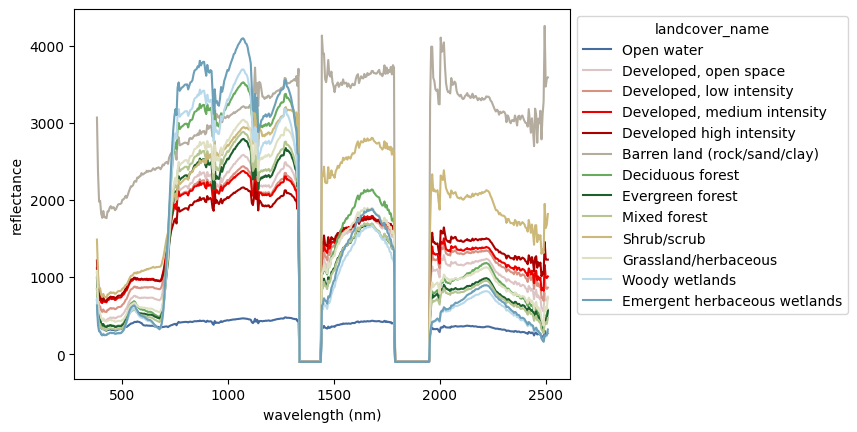

In [23]:
# Plot spectra by landcover type
ax = sns.lineplot(data=df, x="wavelength (nm)", y="reflectance", hue="landcover_name", palette=colDict)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


## Reflection questions
1. What is the spatial resolution of the NEON AOP SDR data? What about the NEON AOP RGB data? And the NLCD data? As you toggle between the RGB data and the NLCD data layers on the map, do you think that the landcover map would look different if it were a different spatial resolution?
2. What does reduceRegions do? How does it deal with the spatial resolution mismatch between NLCD and NEON AOP?
*Hint: check out the [GEE documentation](https://developers.google.com/earth-engine/guides/reducers_reduce_region)*
3. Do the output spectra by landcover type match up with your intuition from our point-and-click spectra exercise?